## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score as r2
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [31]:
x = np.linspace(0,20)
y = -1*x+2

#### Plot your data points. 

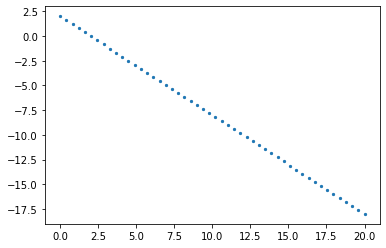

In [32]:
plt.scatter(x,y,s=5)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [33]:
def batchGD(x,y,lr,n):
    th0=0; th1=0; m=x.size; j=[]
    all_th0 = []
    all_th1 = []
    all_h = []
    for i in range(n):
        h = th0 + th1*x
        dj0 = (h-y).sum()/m
        dj1 = ((h-y)*x).sum()/m
        th0 -= lr*dj0
        th1 -= lr*dj1
        all_th0.append(th0)
        all_th1.append(th1)
        all_h.append(h)
        j.append(1/2/m*((h-y)**2).sum())
        if j[-1] == 0.01:
            break
            
    plt.subplots(1,1,figsize=(5,5))
    plt.plot(j)
#     plt.title('loss vs iterations')
    
    plt.subplots(1,1,figsize=(10,5))
    plt.plot(all_th0,j)
    plt.title('loss vs theta0')
    
    plt.subplots(1,1,figsize=(5,5))
    plt.plot(all_th1,j)
    plt.title('loss vs theta1')
    
    plt.subplots(1,1,figsize=(5,5))
    for i in all_h:
        plt.plot(x,i)
    plt.title('All hypothesis')
    
    plt.subplots(1,1,figsize=(5,5))
    plt.scatter(x,y,s=10)
    plt.plot(x,all_h[-1])
    plt.title('Best regression line')
    
    plt.show()
    return all_th0, all_th1, j, all_h, th0, th1


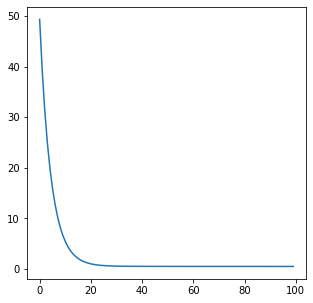

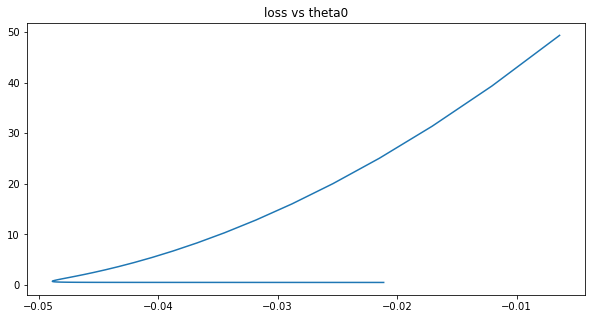

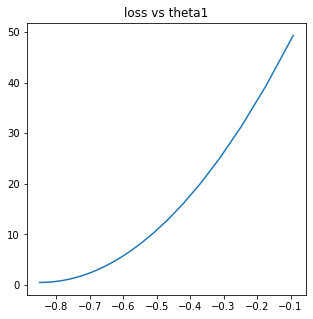

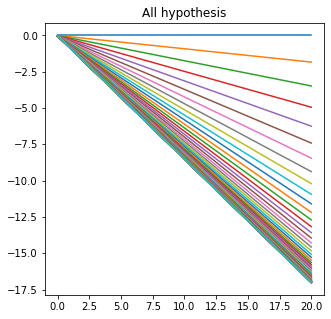

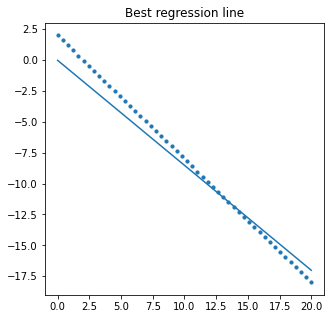

In [34]:
all_th0, all_th1, j, all_h, th0, th1 = batchGD(x,y,0.0008,100)

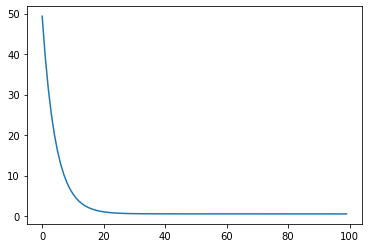

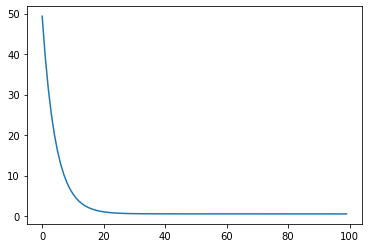

In [35]:
plt.plot(j)
plt.show()
plt.plot(j)
plt.show()

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

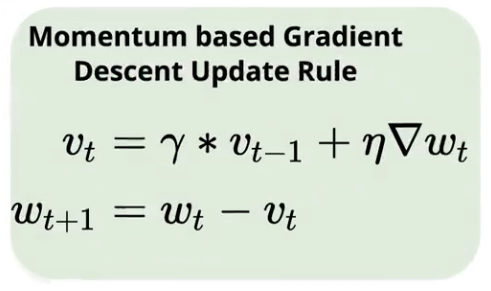

#### γ takes values between 0 and 1.
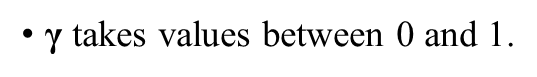

In [36]:
x = np.linspace(0,20)
y = -1*x+2

def mb(x,y,lr,n,g):
    th0=0; th1=0; m=x.size; j=[]; vt0=0; vt1=0
    all_th0 = []
    all_th1 = []
    all_h = []
    for i in range(n):
        h = th0 + th1*x
        dj0 = (h-y).sum()/m
        dj1 = ((h-y)*x).sum()/m
        vt0 = g*vt0 + lr*dj0
        vt1 = g*vt1 + lr*dj1
        th0 -= vt0
        th1 -= vt1
        all_th0.append(th0)
        all_th1.append(th1)
        all_h.append(h)
        j.append(1/2/m*((h-y)**2).sum())
        if j[-1] == 0.001:
            break
    
    print("R2=",r2(y,all_h[-1]),"\n")
    
    plt.plot(j)
    plt.title('loss vs iterations')
    plt.show()
    plt.plot(all_th0,j)
    plt.title('loss vs theta0')
    plt.show()
    plt.plot(all_th1,j)
    plt.title('loss vs theta1')
    plt.show()
    for i in all_h:
        plt.plot(x,i)
    plt.title('All hypothesis')
    plt.show()
    plt.scatter(x,y,s=10)
    plt.plot(x,all_h[-1])
    plt.title('Best regression line')
    plt.show()
    return all_th0, all_th1, j, all_h, th0, th1

R2= 0.9694538883731033 



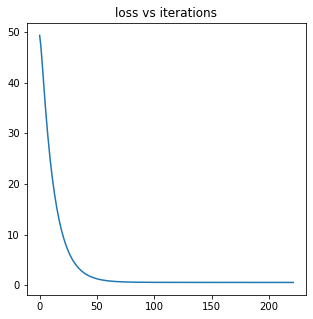

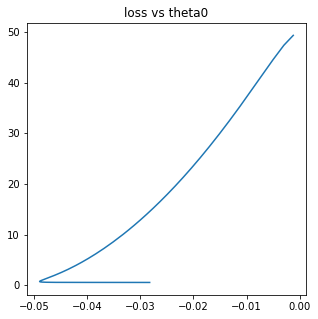

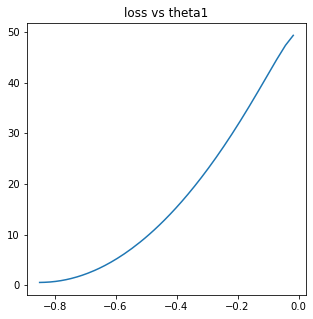

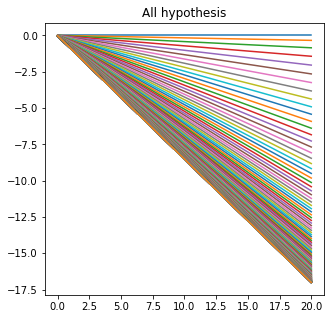

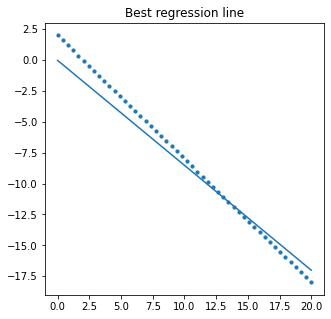

In [37]:
all_th0, all_th1, j, all_h, th0, th1 = mb(x,y,0.00015,222,0.5)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

R2= 0.9731684911527476 



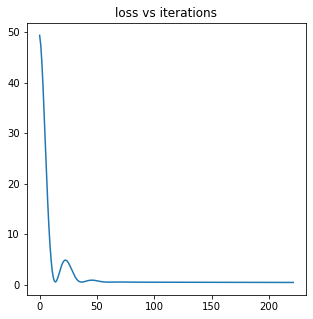

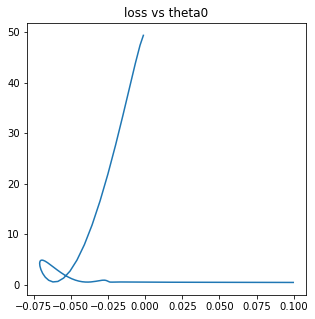

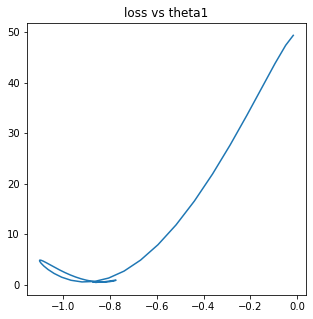

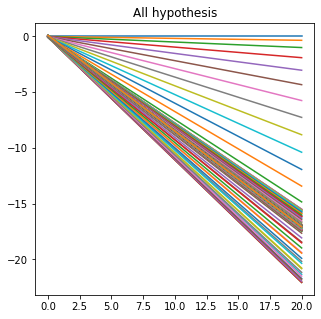

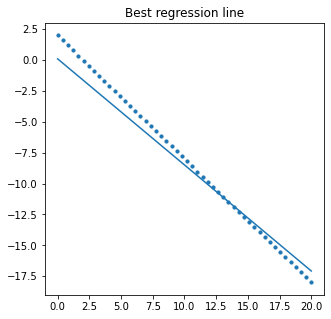

In [38]:
all_th0, all_th1, j, all_h, th0, th1 = mb(x,y,0.00015,222,0.9)

R2= 0.9688795226124406 



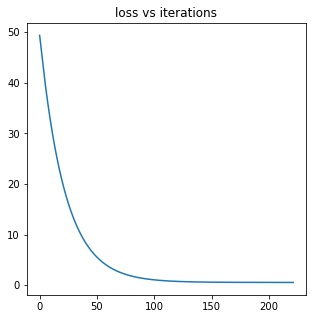

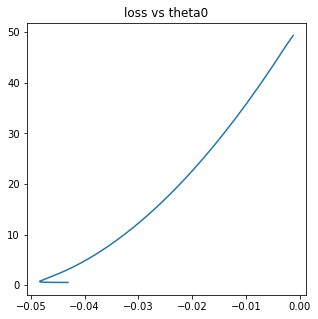

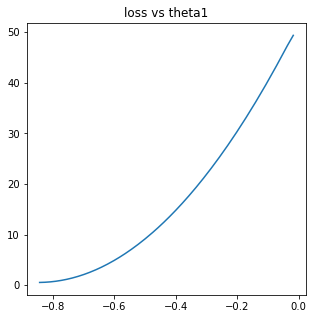

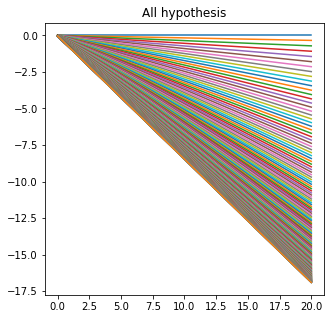

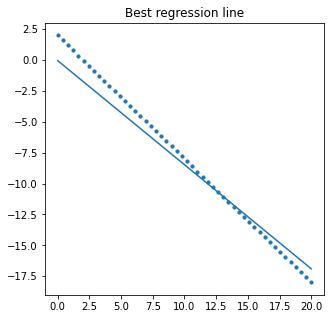

In [39]:
all_th0, all_th1, j, all_h, th0, th1 = mb(x,y,0.00015,222,0.1)

R2= 0.9686123060568612 



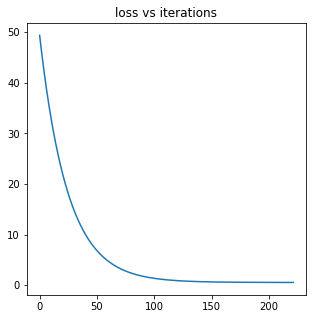

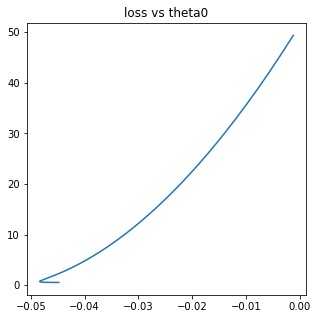

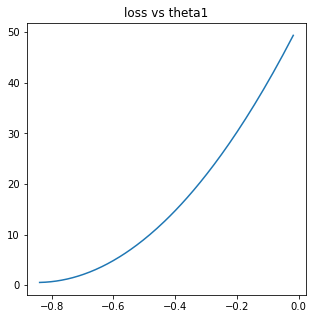

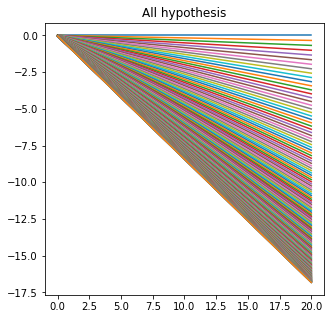

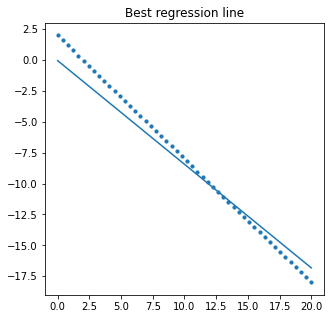

In [40]:
all_th0, all_th1, j, all_h, th0, th1 = mb(x,y,0.00015,222,0)

### Update your Batch GD for one variable  implementation to be NAG and check your results

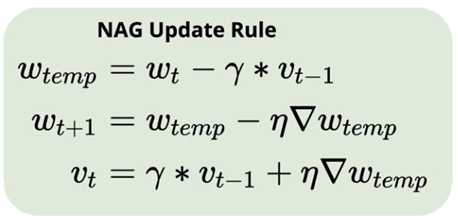

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score as r2
%matplotlib inline

x = np.linspace(0,20)
y = -1*x+2

def mb(x,y,lr,n,g):
    th0=0; th1=0; m=x.size; j=[]; vt0=0; vt1=0
    all_th0 = []
    all_th1 = []
    all_h = []
    for i in range(n):
        th0 -= g*vt0
        th1 -= g*vt1
        h = th0 + th1*x
        dj0 = (h-y).sum()/m
        dj1 = ((h-y)*x).sum()/m
        th0 -= lr*dj0
        th1 -= lr*dj1
        vt0 = g*vt0 + lr*dj0
        vt1 = g*vt1 + lr*dj1
        
        all_th0.append(th0)
        all_th1.append(th1)
        all_h.append(h)
        j.append(1/2/m*((h-y)**2).sum())
        if j[-1] == 0.001:
            break
    
    print("R2=",r2(y,all_h[-1]),"\n")
    plt.plot(j)
    plt.title('loss vs iterations')
    plt.show()
    plt.plot(all_th0,j)
    plt.title('loss vs theta0')
    plt.show()
    plt.plot(all_th1,j)
    plt.title('loss vs theta1')
    plt.show()
    for i in all_h:
        plt.plot(x,i)
    plt.title('All hypothesis')
    plt.show()
    plt.scatter(x,y,s=10)
    plt.plot(x,all_h[-1])
    plt.title('Best regression line')
    plt.show()
    
    return all_th0, all_th1, j, all_h, th0, th1

R2= 0.9691784148431577 



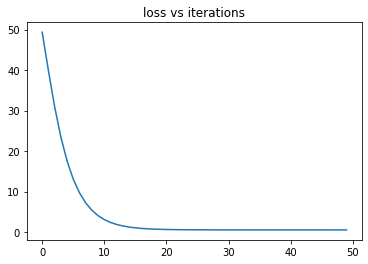

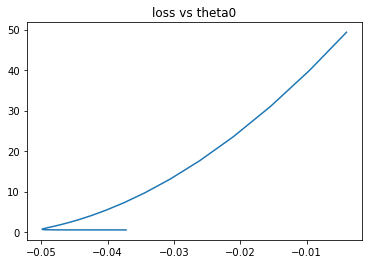

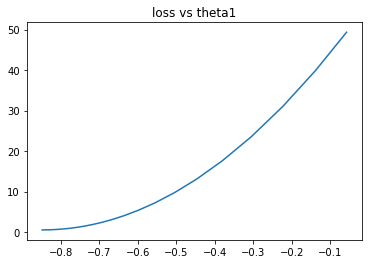

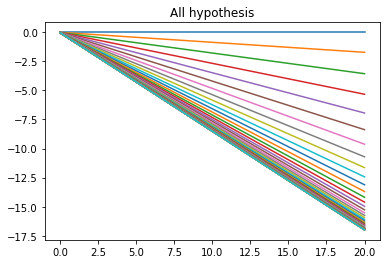

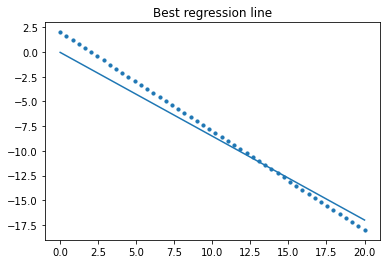

In [48]:
all_th0, all_th1, j, all_h, th0, th1 = mb(x,y,0.0005,50,0.5)

In [ ]:
plt.plot(j)
plt.title('loss vs iterations')
plt.show()

plt.plot(all_th0,j)
plt.title('loss vs theta0')
plt.show()

plt.plot(all_th1,j)
plt.title('loss vs theta1')
plt.show()

for i in all_h:
    plt.plot(x,i)
    plt.title('All hypothesis')
    plt.show()
    
plt.scatter(x,y,s=10)
plt.plot(x,all_h[-1])
plt.show()

## Congratulations 
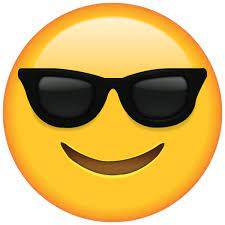